# Project 3: Regression analysis and Gapminder data

In [2]:
import pandas as pd
import numpy as np 
import statsmodels.formula.api as sm 
from plotnine import * 


In [3]:
lex = pd.read_csv('gapminder.csv', dtype={'origin':np.str})
lex.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Exercise 1: Make a scatter plot of life expectancy across time

In [4]:
graph_obj = (ggplot(lex, aes(x='factor(year)', y ='lifeExp')) + geom_violin())
graph_obj

C:\Users\yosep\Miniconda3\envs\cmsc320\lib\site-packages\plotnine\coords\coord_cartesian.py:31: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
C:\Users\yosep\Miniconda3\envs\cmsc320\lib\copy.py:274: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
C:\Users\yosep\Miniconda3\envs\cmsc320\lib\site-packages\plotnine\scales\scale.py:89: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):


AttributeError: 'Series' object has no attribute 'as_matrix'

### Question 1:

Life expectancy is trending up in a linear fashion.

### Question 2:

The distribution of life expectancy is skewed for each year. Depending on the year the distribution of life expectancy could be unimodal or not. We see a unimodal distribution from the year 1977 and onwards. It is not symmetric.

### Question 3:

I would reject the null hypothesis of no relationship. 

### Question 4:

Starting form the left, there would be a bunching of values at the top. As we move closer towards 2007 the the points will bunch towards the bottom  for that given year. 

### Question 5:

It should look like a linear function that is decreasing. 

## Exercise 2: Fit a linear regression model using the lm function for life expectancy vs. year (as a continuous variable). 

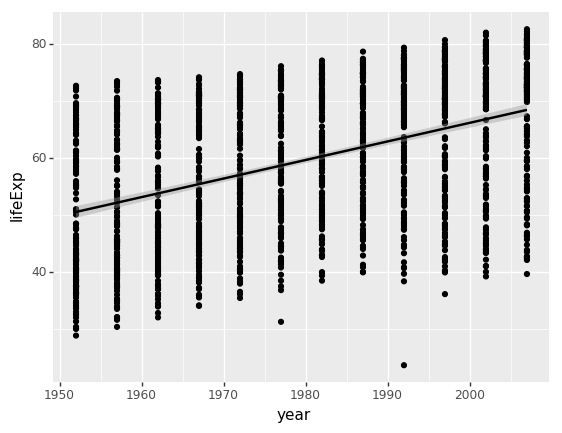

<ggplot: (79024252799)>

In [130]:
(ggplot(lex, aes(x='year', y='lifeExp')) 
 + geom_point()
 + geom_smooth(method='lm'))


### Question 6: On average, by how much does life expectancy increase every year around the world?

In [131]:
res = sm.ols('lifeExp~year', data=lex).fit()
res.params

Intercept   -585.652187
year           0.325904
dtype: float64

On average life expectancy increases by .325704 

### Question 7:  Do you reject the null hypothesis of no relationship between year and life expectancy? Why?

I reject the null hypothesis of no relationship between year and life expectancy. There seems to be an increasing relationship between life expectancy and years. As indicated by the violin plot. 

## Exercise 3: Make a violin plot of residuals vs. year for the linear model from Exercise 2

In [132]:
lex_residual = lex.copy()
lex_residual['fitted'] = res.fittedvalues
lex_residual['resid'] = res.resid
lex_residual.head()

,country,continent,year,lifeExp,pop,gdpPercap,fitted,resid
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,50.512084,-21.711084
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,52.141603,-21.809603
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,53.771122,-21.774122
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,55.400642,-21.380642
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,57.030161,-20.942161


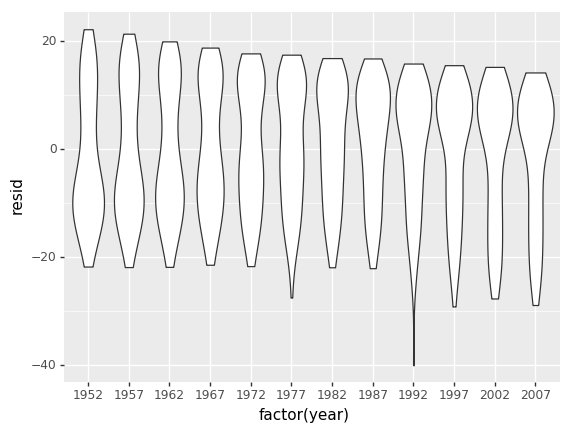

<ggplot: (-9223371957829137713)>

In [133]:
(ggplot(lex_residual, aes(x='factor(year)', y='resid')) 
 + geom_violin() )

### Question 8:

Yes the plot of exercise 3 closely resembles my expectation. As the years increase, the residual of most countries is trending to zero. This means that most countries are trending towards the average. 

## Exercise 4: Make a boxplot (or violin plot) of model residuals vs. continent.

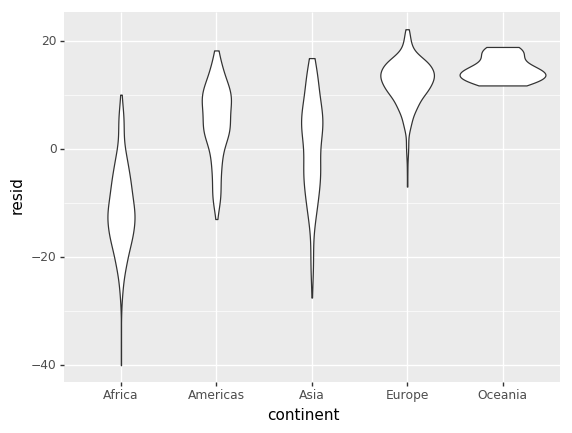

<ggplot: (-9223371957830768931)>

In [134]:
(ggplot(lex_residual, aes(x='continent',y='resid')) 
    + geom_violin())

### Question 9:

Yes there is a dependent relationship. Depending on the continent the residual varies. This would suggest an additional relationship of continent in the regression model. 

## Exercise 5: Use geom_smooth(method=lm) in ggplot as part of a scatter plot of life expectancy vs. year, grouped by continent (e.g., using the color aesthetic mapping).

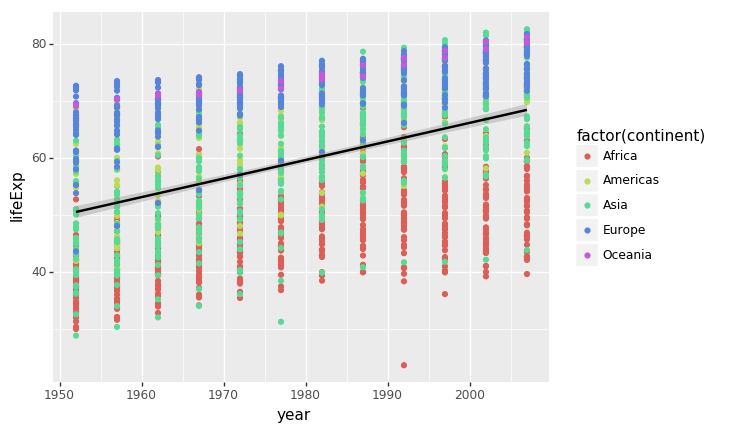

<ggplot: (79023903173)>

In [135]:
(ggplot(lex, aes(x='year', y='lifeExp')) 
    + geom_point(aes(color ='factor(continent)'))
    + geom_smooth(method='lm') )

### Question 10:

Our regression model should include an interaction term for continent and year. The concentration of life expectancy for a given year seems to depend on which continent the country belongs to. 

## Exercise 6:  Fit a linear regression model for life expectancy including a term for an interaction between continent and year.

In [136]:
cont_model = sm.ols('lifeExp~year*continent',data=lex).fit()
cont_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:25:56   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -524.2578     32.963    -15.904      0.000    -588.911    -459.605
continent[T.Americas]       -138.8484     57.851     -2.400      0.016    -252.315     -25.382
continent[T.Asia]           -312.6330     52.904     -5.909      0.000    -416.396    -208.870
continent[T.Europe]          156.8469     54.498      2.878      0.004      49.957     263.737
continent[T.Oceania]         182.3499    171.283      1.065      0.287    -153.599     518.298
year                           0.2895      0.017     17.387      0.000       0.257       0.322
year:continent[T.Americas]     0.0781      0.029      2.673      0.008       0.021       0.135
year:continent[T.Asia]         0.1636      0.027      6.121      0.000       0.111       0.216
year:continent[T.Europe]      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
year:continent[T.Oceania]     -0.0793      0.087     -0.916      0.360      -0.249       0.090
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     2.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question 11:

Parameters with continent involved differed significantly from 0. Parameters with year involved are closer to zero. 

### Question 12:

On average it increases by .2895 each year for Africa, .0781 each year for the Americans, .1636 for Asia, -.0676 for Europe, and -.0793 for oceania. 

## Exercise 7

In [145]:
lex_ano = lex.copy()
lex_ano['resid'] = cont_model.resid
lex_ano['fit'] = cont_model.fittedvalues

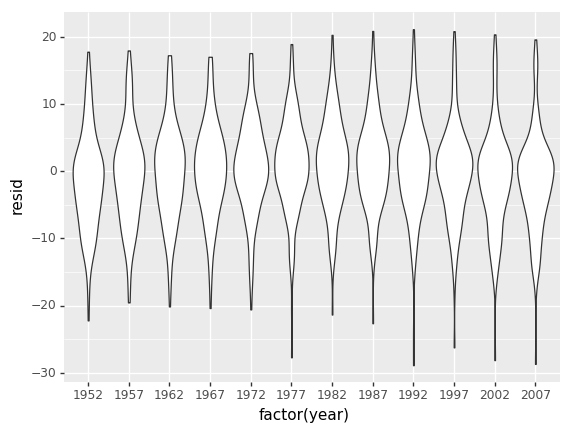

<ggplot: (79025488851)>

In [143]:
(ggplot(lex_ano, aes(x='factor(year)', y='resid')) 
    + geom_violin())

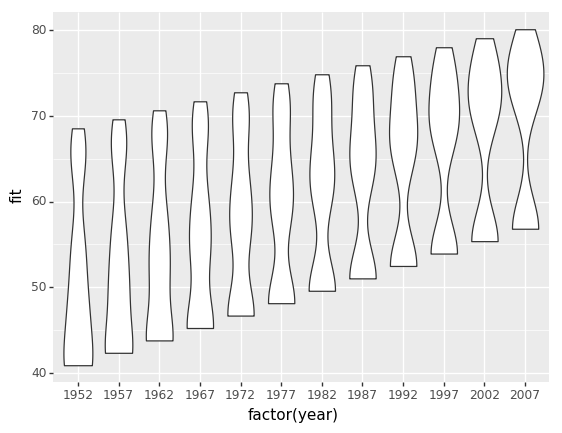

<ggplot: (-9223371957830357416)>

In [147]:
(ggplot(lex_ano, aes(x='factor(year)', y='fit')) 
    + geom_violin())